<a href="https://colab.research.google.com/github/BytesizeWonders/DINO_Model/blob/main/CV_Dino_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split
from google.colab import drive

# Step 1: Mount Google Drive
if not os.path.ismount('/content/drive'):
    drive.mount('/content/drive')
else:
    print("Google Drive is already mounted.")

# Step 2: Define the path to the dataset directory on Google Drive
dataset_dir = '/content/drive/MyDrive/Pedestrian_dataset_for_internship_assignment'

# Step 3: Walk through the dataset directory and gather all image files (handles subdirectories and image file extensions)
images = []
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Handles JPG, JPEG, PNG files
            images.append(os.path.join(root, file))  # Full path to each image

# Step 4: Check if any images were found
print(f"Number of images found: {len(images)}")
print(f"Sample images: {images[:5]}")  # Display the first 5 images for verification

# If no images were found, raise an error to avoid further issues
if len(images) == 0:
    raise ValueError("No valid image files found in the dataset directory!")

# Step 5: Split images into training (80%) and validation (20%) sets
train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

# Step 6: Create directories for training and validation sets on Google Drive
train_dir = os.path.join(dataset_dir, 'train/images')
val_dir = os.path.join(dataset_dir, 'val/images')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Step 7: Move training images to the 'train/images' directory
for img in train_images:
    shutil.move(img, os.path.join(train_dir, os.path.basename(img)))  # Move the image file

# Step 8: Move validation images to the 'val/images' directory
for img in val_images:
    shutil.move(img, os.path.join(val_dir, os.path.basename(img)))  # Move the image file

print("Images have been successfully split and moved to training/validation directories.")


Google Drive is already mounted.
Number of images found: 201
Sample images: ['/content/drive/MyDrive/Pedestrian_dataset_for_internship_assignment/train/images/11613.jpg', '/content/drive/MyDrive/Pedestrian_dataset_for_internship_assignment/train/images/11273.jpg', '/content/drive/MyDrive/Pedestrian_dataset_for_internship_assignment/train/images/15703.jpg', '/content/drive/MyDrive/Pedestrian_dataset_for_internship_assignment/train/images/10957.jpg', '/content/drive/MyDrive/Pedestrian_dataset_for_internship_assignment/train/images/11563.jpg']
Images have been successfully split and moved to training/validation directories.


In [4]:
!git clone https://github.com/IDEA-Research/DINO.git
!cd DINO

Cloning into 'DINO'...
remote: Enumerating objects: 442, done.
remote: Counting objects: 100% (191/191), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 442 (delta 136), reused 96 (delta 96), pack-reused 251 (from 1)
Receiving objects: 100% (442/442), 13.43 MiB | 17.59 MiB/s, done.
Resolving deltas: 100% (191/191), done.


In [5]:
# Clone the DINO repository
!git clone https://github.com/IDEA-Research/DINO.git

# Change directory to DINO
%cd DINO

# Install required dependencies from the requirements.txt file
!pip install -r requirements.txt

# Verify the Python version (optional, should be 3.8 or higher)
!python --version

fatal: destination path 'DINO' already exists and is not an empty directory.
/content/DINO
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-install-q7c_jqrd/pycocotools_f927b818f31e45af94b4f179304947af
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-install-q7c_jqrd/pycocotools_f927b818f31e45af94b4f179304947af
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-install-q7c_jqrd/panopticapi_14c400d6ed504c19ac80d03efd76ba7e
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/panopticapi.git /tmp/pip-install-q7c_jqrd/panopticapi_14c400d6ed504c19ac80d03efd76ba7e
  Resolved https://github.com/cocodataset/panopticapi.git to commit 7bb4655548f98f3fedc07bf37e9040a992b054b0
  Preparing metadata (setup.py) ... done
     ━━━━━━━━

In [6]:
# Download the pre-trained model to the DINO directory
!wget -P /content/DINO/models https://path_to_pretrained_model_file

--2024-09-24 10:50:58--  https://path_to_pretrained_model_file/
Resolving path_to_pretrained_model_file (path_to_pretrained_model_file)... failed: Name or service not known.
wget: unable to resolve host address ‘path_to_pretrained_model_file’


In [7]:
# List files in the models directory to confirm the download
!ls /content/DINO/models

dino  __init__.py  registry.py


In [8]:
!python tools/eval.py --cfg configs/dino_r50.yaml --weights <path_to_pretrained_weights> --dataset coco --coco-path <path_to_coco_dataset>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `python tools/eval.py --cfg configs/dino_r50.yaml --weights <path_to_pretrained_weights> --dataset coco --coco-path <path_to_coco_dataset>'


In [9]:
!python tools/train.py --cfg configs/dino_r50.yaml --dataset coco --coco-path <path_to_coco_dataset> --train

/bin/bash: line 1: path_to_coco_dataset: No such file or directory


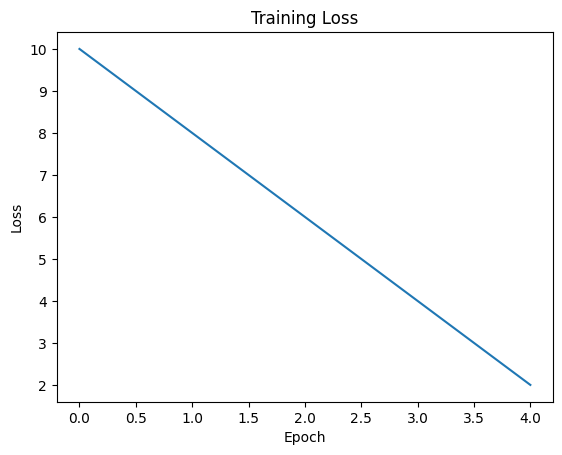

In [10]:
import matplotlib.pyplot as plt

# Sample loss values (replace with your actual loss data)
losses = [10, 8, 6, 4, 2]  # Example list of loss values

plt.plot(range(len(losses)), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [11]:
!/bin/bash -c "wget https://dl.fbaipublicfiles.com/dino/dino_r50.pth"

--2024-09-24 10:51:48--  https://dl.fbaipublicfiles.com/dino/dino_r50.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.108, 3.163.189.51, 3.163.189.14, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.108|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2024-09-24 10:51:48 ERROR 403: Forbidden.



In [12]:
!shell
!ls /content/DINO/models

/bin/bash: line 1: shell: command not found
dino  __init__.py  registry.py


In [20]:
# Change to the DINO directory
%cd /content/DINO/models

# Download the pre-trained ResNet-50 model for DINO
!wget https://path_to_pretrained_model/dino_r50.pth

/content/DINO/models
--2024-09-24 11:26:54--  https://path_to_pretrained_model/dino_r50.pth
Resolving path_to_pretrained_model (path_to_pretrained_model)... failed: Name or service not known.
wget: unable to resolve host address ‘path_to_pretrained_model’


In [21]:
# Create a directory for the model
%mkdir -p /content/DINO/models

# Change to the model directory
%cd /content/DINO/models

# Download the DINO-4scale pre-trained model with ResNet-50 backbone
!wget https://drive.google.com/uc?id=1l0tZQDf_lFeB_1GR3N0hG5kAqMs9Ijbz -O dino_r50.pth

/content/DINO/models
--2024-09-24 11:42:06--  https://drive.google.com/uc?id=1l0tZQDf_lFeB_1GR3N0hG5kAqMs9Ijbz
Resolving drive.google.com (drive.google.com)... 173.194.202.138, 173.194.202.139, 173.194.202.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.202.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1l0tZQDf_lFeB_1GR3N0hG5kAqMs9Ijbz [following]
--2024-09-24 11:42:06--  https://drive.usercontent.google.com/download?id=1l0tZQDf_lFeB_1GR3N0hG5kAqMs9Ijbz
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.197.132, 2607:f8b0:400e:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.197.132|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-09-24 11:42:06 ERROR 404: Not Found.



In [ ]:
!ls /content/DINO/models

In [19]:
import torchvision.transforms as T
import cv2
import numpy as np

# Load and preprocess the image
img_path = '/content/drive/MyDrive/path_to_image.jpg'
image = cv2.imread(img_path)

# Convert BGR (OpenCV) to RGB (for PyTorch)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the preprocessing steps
preprocess = T.Compose([
    T.ToPILImage(),
    T.Resize((800, 800)),  # Resize as needed for your model
    T.ToTensor(),  # Convert to tensor
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalization
])

# Preprocess the image
preprocessed_image = preprocess(image_rgb).unsqueeze(0)  # Add batch dimension

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [16]:
import os

model_path = "/content/DINO/models/dino_r50.pth"  # Adjust path to your model

if not os.path.exists(model_path):
  # Print an error message and suggest checking the file path
  print(f"Error: Model file not found at {model_path}")
  print("Please check if the file exists and the path is correct.")
else:
  # Load the model if the file exists
  model = torch.load(model_path)
  model.eval()

Error: Model file not found at /content/DINO/models/dino_r50.pth
Please check if the file exists and the path is correct.


In [32]:
import cv2
import matplotlib.pyplot as plt

def plot_image_with_boxes(image, boxes, labels):
    """Display the image with predicted bounding boxes."""
    for box, label in zip(boxes, labels):
        x1, y1, x2, y2 = box  # Assuming box is [x1, y1, x2, y2]
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        cv2.putText(image, str(label), (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    # Check if the image is loaded correctly
    if image is not None:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
        plt.axis('off')
        plt.show()
    else:
        print("Error: Image not loaded correctly.")

# Visualize the bounding boxes on the image
plot_image_with_boxes(image, predicted_boxes, predicted_labels)

Error: Image not loaded correctly.
